#ARMA Practical for Forecasting Stationary Time Series

✅ Step-by-Step Code with Comments

In [13]:
# ---------------------------------------------
# 📦 Step 1: Install Required Libraries (for Colab)
# ---------------------------------------------
!pip install statsmodels --quiet
!pip install pmdarima --quiet

In [14]:
# ---------------------------------------------
# 📚 Step 2: Import Libraries
# ---------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [15]:
# ---------------------------------------------
# 🔧 Step 3: Generate Synthetic Stationary Data
# ---------------------------------------------
# ARMA models assume the data is stationary
# We'll generate synthetic data using white noise + auto-regressive structure

np.random.seed(42)

# Generate white noise
n = 200
noise = np.random.normal(loc=0, scale=1, size=n)

# Create ARMA-like series manually (AR(2) + MA(1))
data = []
for t in range(n):
    if t == 0:
        val = noise[t]
    elif t == 1:
        val = 0.7 * data[t-1] + noise[t]
    else:
        val = 0.7 * data[t-1] - 0.3 * data[t-2] + 0.5 * noise[t-1] + noise[t]
    data.append(val)

# Put into DataFrame
df = pd.DataFrame({'Value': data})
df.index = pd.date_range(start='2020-01-01', periods=n, freq='D')


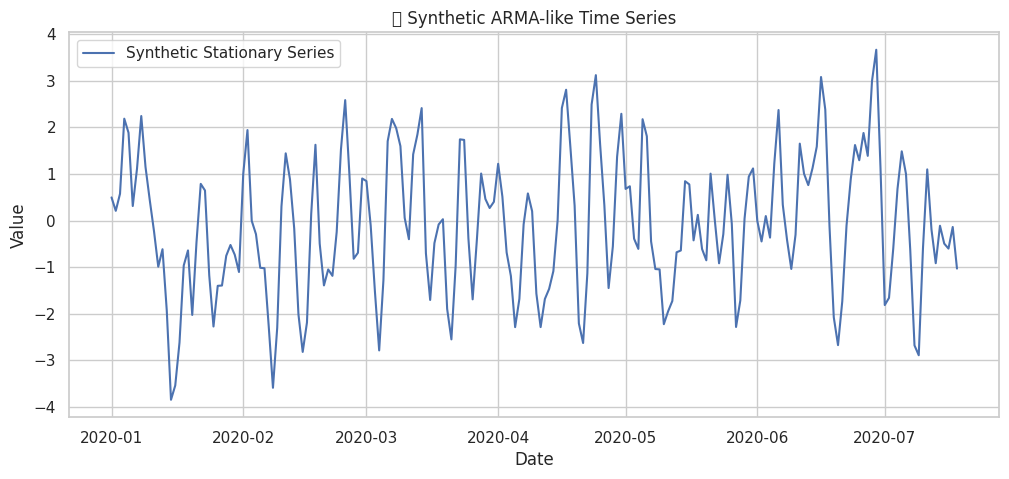

In [16]:
# ---------------------------------------------
# 📈 Step 4: Visualize Time Series
# ---------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df['Value'], label='Synthetic Stationary Series')
plt.title("📉 Synthetic ARMA-like Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [17]:
# ---------------------------------------------
# ✂️ Step 5: Train-Test Split
# ---------------------------------------------
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [18]:
# ---------------------------------------------
# 🤖 Step 6: Fit ARMA Model (ARIMA with d=0)
# ---------------------------------------------
# Since data is stationary, d=0 → ARIMA(p,0,q) ≡ ARMA(p,q)

model = ARIMA(train, order=(2, 0, 1))  # ARMA(2,1)
arma_model = model.fit()

In [19]:
# ---------------------------------------------
# 🔮 Step 7: Forecast Next Values
# ---------------------------------------------
forecast = arma_model.forecast(steps=len(test))

In [20]:
# ---------------------------------------------
# 🧮 Step 8: Evaluate the Forecast
# ---------------------------------------------
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print("📊 Forecast Evaluation Metrics:")
print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")

📊 Forecast Evaluation Metrics:
MAE  : 1.333
MSE  : 2.683
RMSE : 1.638


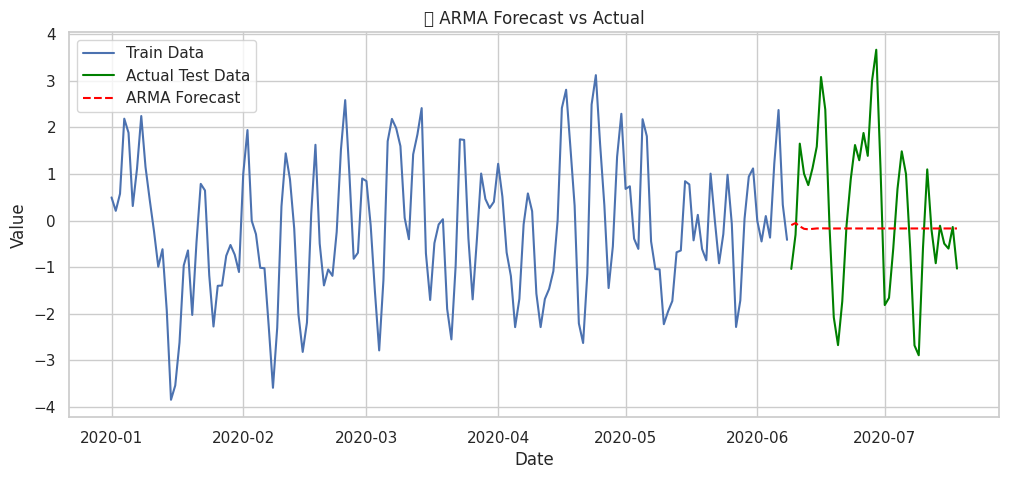

In [21]:
# ---------------------------------------------
# 📉 Step 9: Plot Forecast vs Actual
# ---------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Value'], label='Train Data')
plt.plot(test.index, test['Value'], label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='ARMA Forecast', color='red', linestyle='--')
plt.title('🔍 ARMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

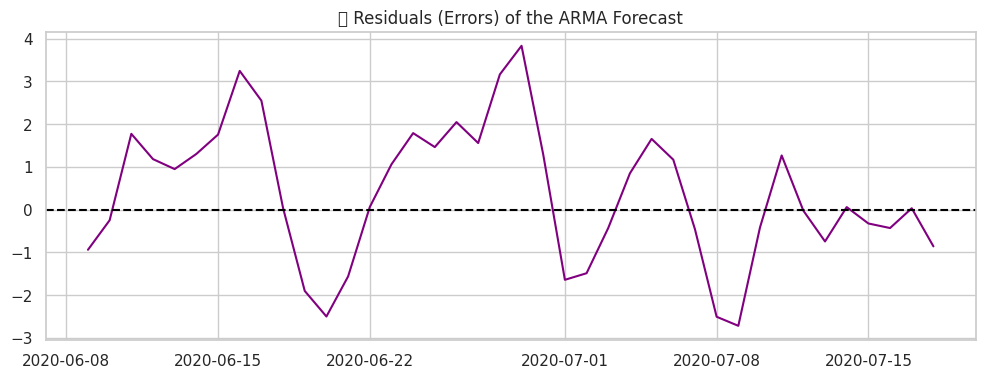

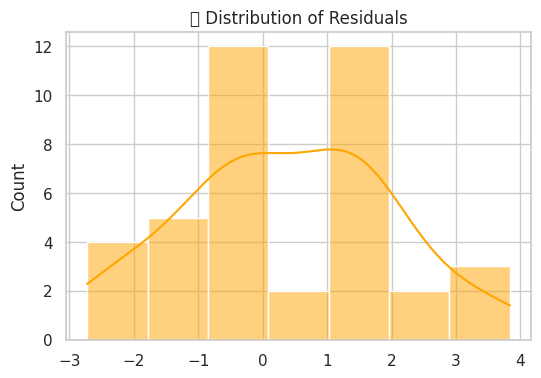

In [22]:
# ---------------------------------------------
# 📊 Step 10: Plot Residuals
# ---------------------------------------------
residuals = test['Value'] - forecast

plt.figure(figsize=(12, 4))
plt.plot(residuals, color='purple')
plt.title('📉 Residuals (Errors) of the ARMA Forecast')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



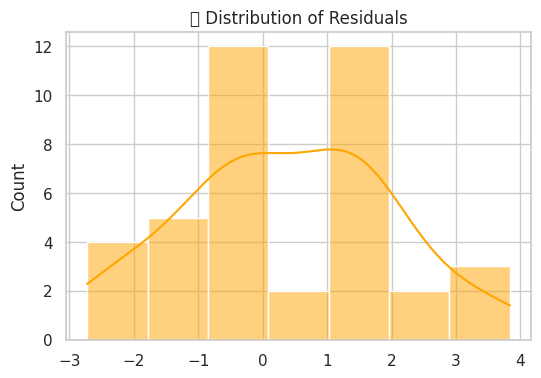

In [23]:
# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title('📊 Distribution of Residuals')
plt.show()

#🔍 Why ARMA?
ARMA models are suitable only for stationary data (no trend or seasonality). If you have non-stationary data, ARIMA or SARIMA is more appropriate.

🧪 Key Concepts Practiced:

Synthetic stationary series generation

Difference between ARIMA and ARMA (d=0)

Residual analysis and error metrics

Time-based forecasting

Model interpretation